In [ ]:
(    total time)\:\s*(\d*\.\d*)

In [ ]:
(    events per second)\:\s*(\d*\.\d*)

In [ ]:
(         avg)\:\s*(\d*\.\d*)

In [ ]:
(         sum)\:\s*(\d*\.\d*)

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import itertools
import json
import pip
import jsonpath
import re
import random
from datetime import datetime
%matplotlib inline

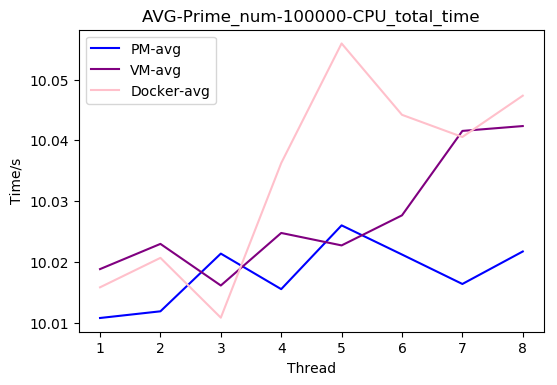

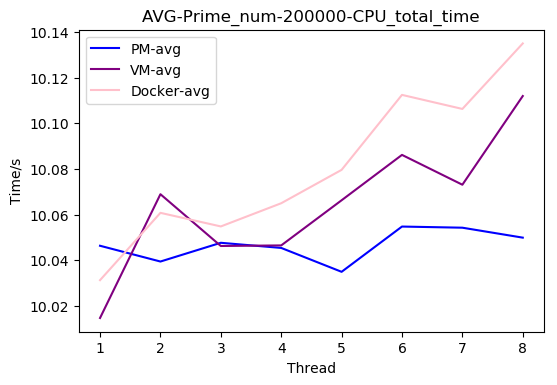

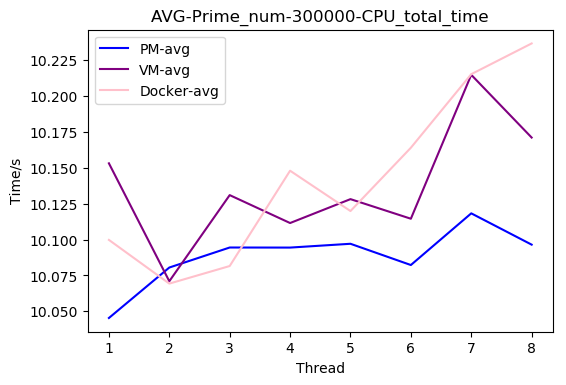

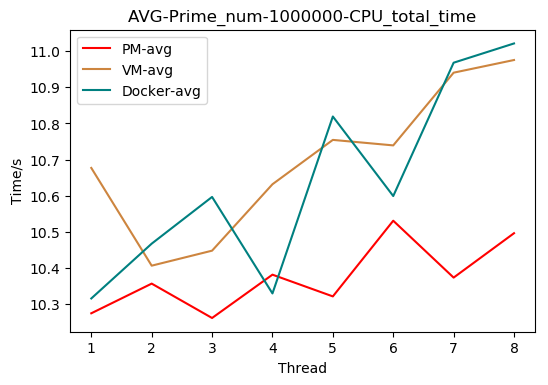

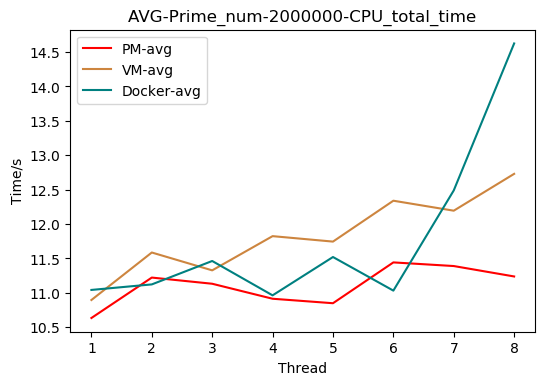

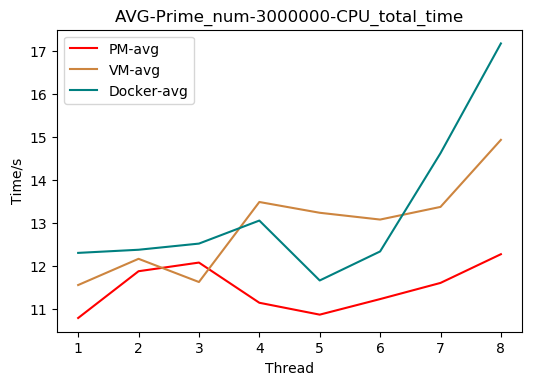

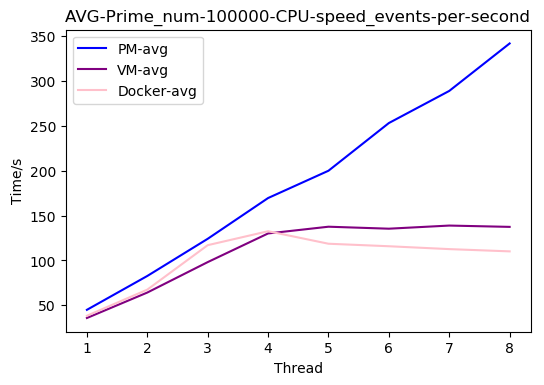

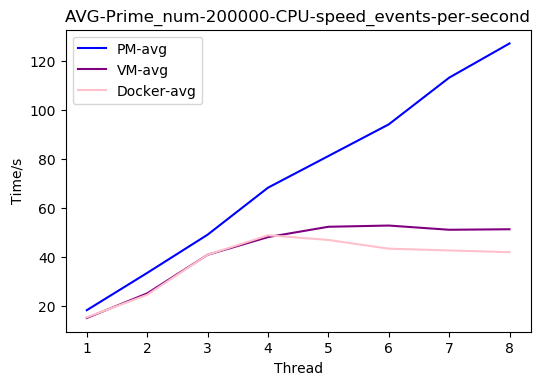

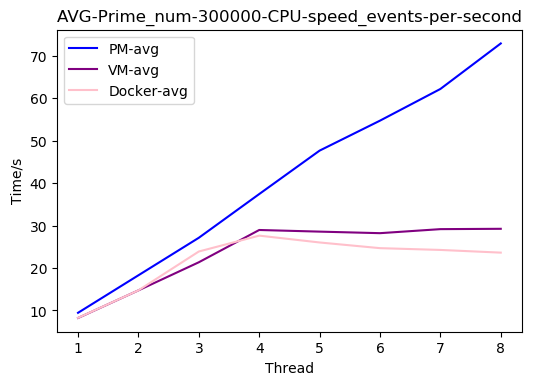

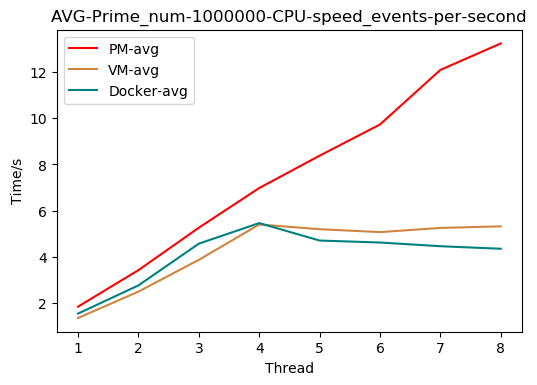

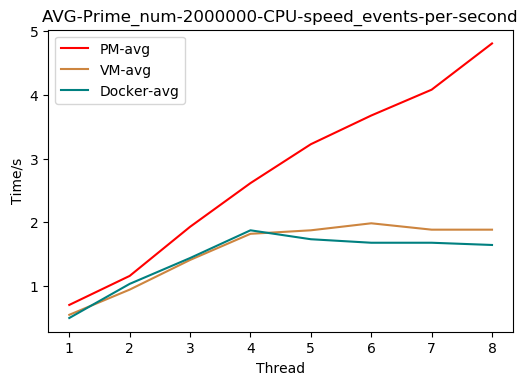

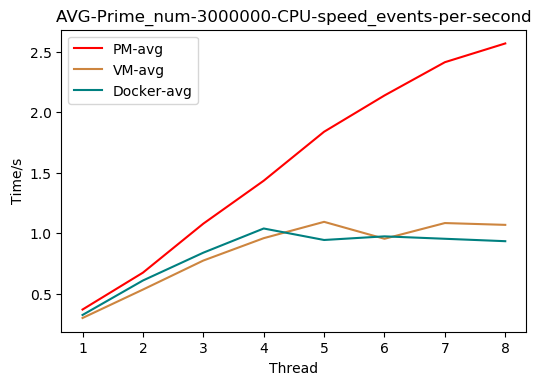

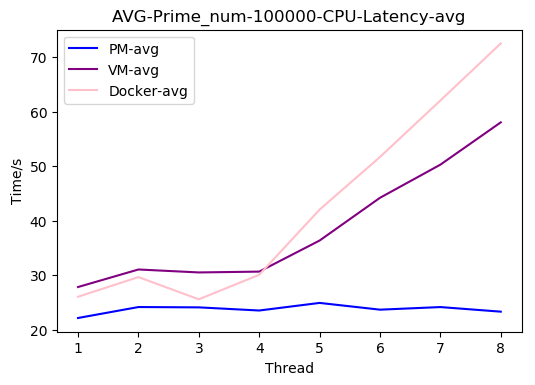

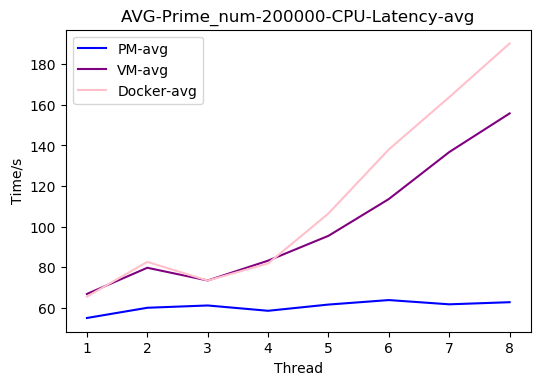

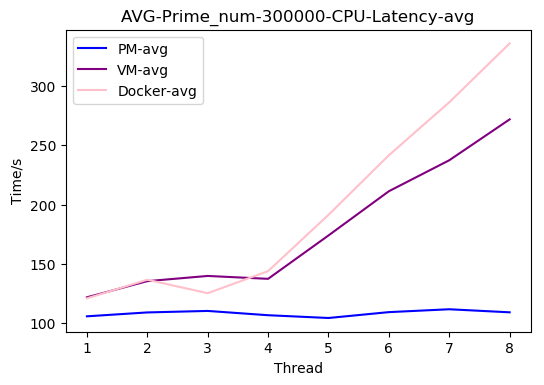

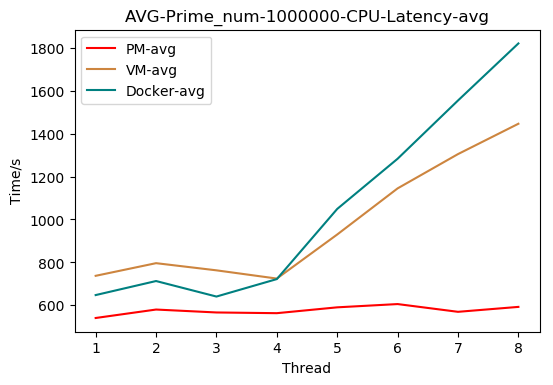

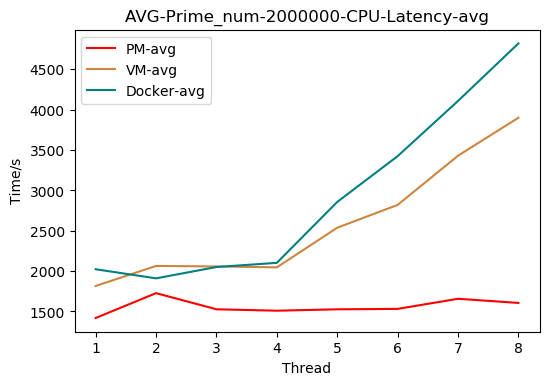

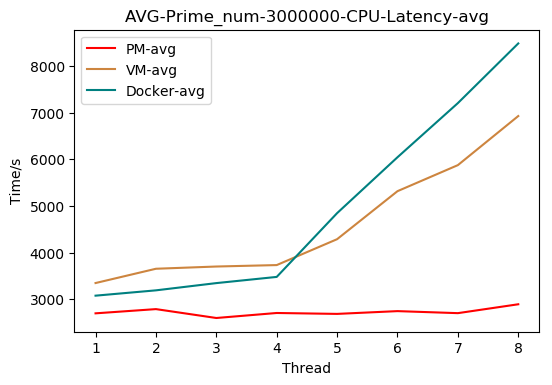

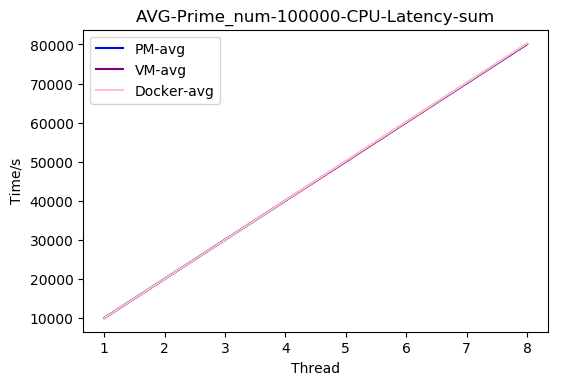

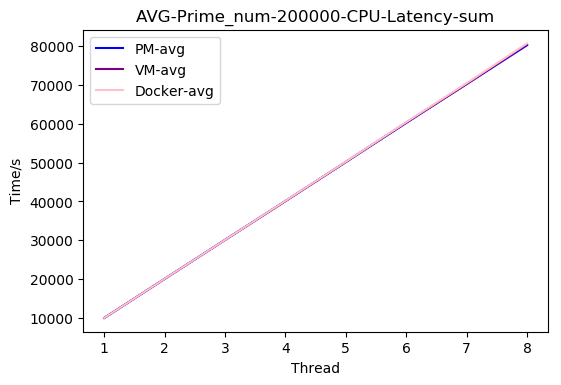

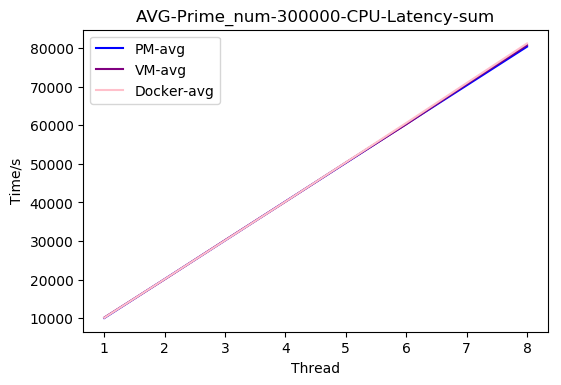

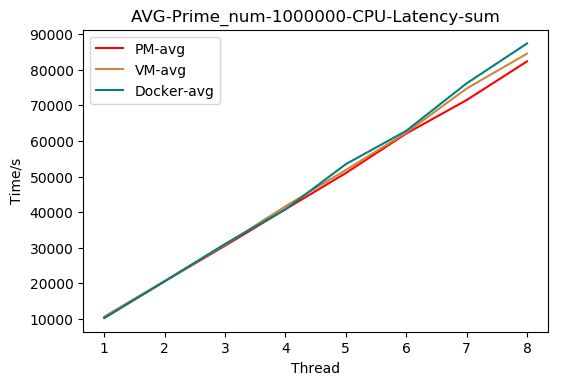

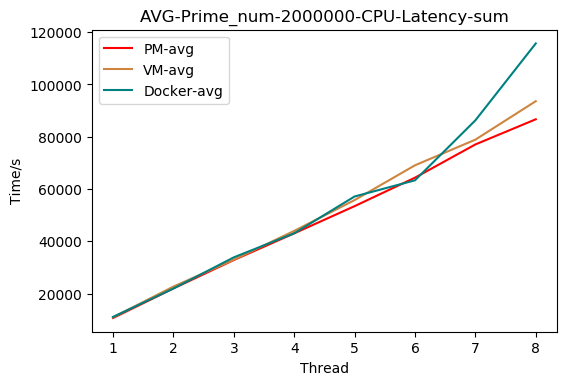

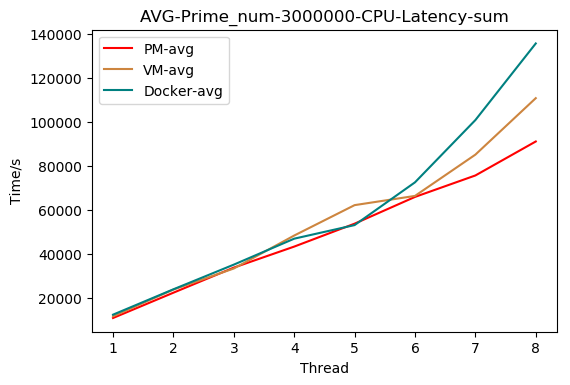

In [7]:
num = 16
n = 0
n1 = 1
match = ["(    total time)\:\s*(\d*\.\d*)","(    events per second)\:\s*(\d*\.\d*)","(         avg)\:\s*(\d*\.\d*)","(         sum)\:\s*(\d*\.\d*)"]
title = ['-CPU_total_time','-CPU-speed_events-per-second','-CPU-Latency-avg','-CPU-Latency-sum']
file_name = ['total-time','cpu-speed','Latency-avg','Latency-sum']
pm_data = []
vm_data = []
c_data = []
for ii in range(num):
    with open("MSC/PM/txt/Cpu-sysbench"+ str(n1) +".txt") as f:

        lines = f.readlines()
        #pm_exe_time = []
        for line in lines:
            m2 = re.match(match[n], line)
            if m2:
                #print(m2.group(3))
                pm_data.append(float(m2.group(2)))

    with open("MSC/VM/txt/Cpu-sysbench"+ str(n1) +".txt") as f:

        lines = f.readlines()
        #vm_exe_time = []
        for line in lines:
            m2 = re.match(match[n], line)
            if m2:
                #print(m2.group(3))
                vm_data.append(float(m2.group(2)))
    
    with open("MSC/Docker/txt/Cpu-sysbench"+ str(n1) +".txt") as f:

        lines = f.readlines()
        #c_exe_time = []
        for line in lines:
            m2 = re.match(match[n], line)
            if m2:
                #print(m2.group(3))
                c_data.append(float(m2.group(2)))
    n1 += 1
    if((ii+1)%4 == 0): 
       
        n1 = 1
        #print(pm_exe_time[72:80])
        num = 48
        i = 0
        i2 = 0
        count = 0
        num_prime = 100000
        x = ['1','2','3','4','5','6','7','8']
        
        pm1 = [(pm_data[i] + pm_data[i+24])/2 for i in range(0,24)]
        vm1 = [(vm_data[i] + vm_data[i+24])/2 for i in range(0,24)]
        c1 = [(c_data[i] + c_data[i+24])/2 for i in range(0,24)]
        pm2 = [(pm_data[i] + pm_data[i+24])/2 for i in range(48,72)]
        vm2 = [(vm_data[i] + vm_data[i+24])/2 for i in range(48,72)]
        c2 = [(c_data[i] + c_data[i+24])/2 for i in range(48,72)]
      

        while i < 24:    
            plt.plot(x,pm1[i:(i+8)], color='b', label="PM-avg")
            plt.plot(x,vm1[i:(i+8)], color='purple', label="VM-avg")
            plt.plot(x,c1[i:(i+8)], color='pink', label="Docker-avg")

            i += 8
            count += 1

            plt.legend(loc='best')
            plt.title('AVG-Prime_num-'+ str(num_prime) + title[n])
            plt.xlabel("Thread")
            plt.ylabel("Time/s")
            plt.rcParams['figure.figsize'] = (6.0, 4.0)
            plt.rcParams['figure.dpi'] = 100
            plt.rcParams['savefig.dpi'] = 100
            #plt.savefig('MSC/CPU-image/'+ file_name[n] +'/avg-plot'+str(count)+'.png')
            plt.show()
            if((i)%8 == 0): 
                num_prime += 100000

        num_prime = 1000000
        count = 3
        while i2 < 24:    
            plt.plot(x,pm2[i2:(i2+8)], color='r', label="PM-avg")
            plt.plot(x,vm2[i2:(i2+8)], color='peru', label="VM-avg")
            plt.plot(x,c2[i2:(i2+8)], color='teal', label="Docker-avg")

            i2 += 8
            count += 1

            plt.legend(loc='best')
            plt.title('AVG-Prime_num-'+ str(num_prime) + title[n])
            plt.xlabel("Thread")
            plt.ylabel("Time/s")
            plt.rcParams['figure.figsize'] = (6.0, 4.0)
            plt.rcParams['figure.dpi'] = 100
            plt.rcParams['savefig.dpi'] = 100
            #plt.savefig('MSC/CPU-image/'+ file_name[n] +'/avg-plot'+str(count)+'.png')
            plt.show()
            if((i2)%8 == 0): 
                num_prime += 1000000
        n += 1
        pm_data = []
        vm_data = []
        c_data = []
 

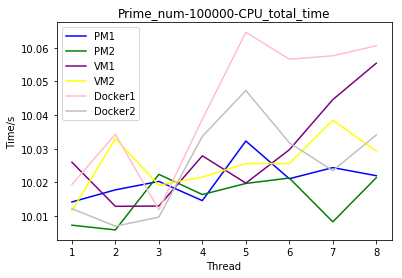

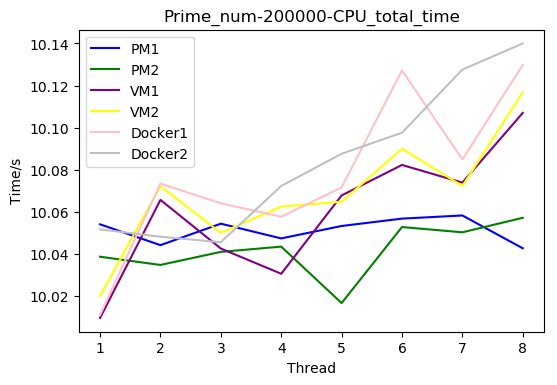

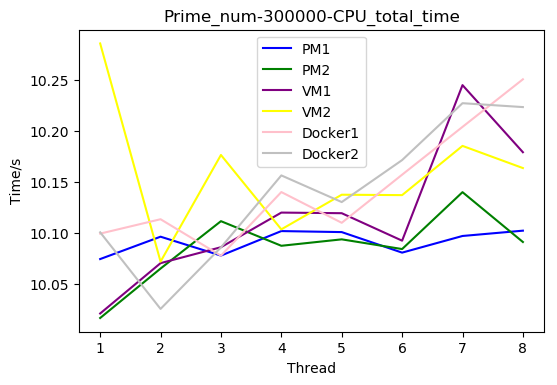

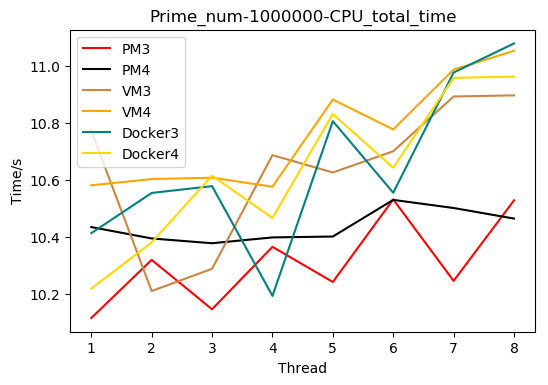

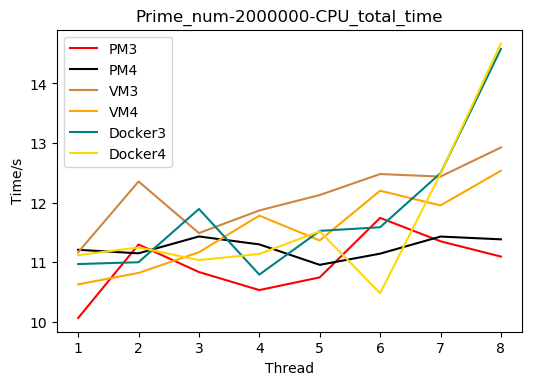

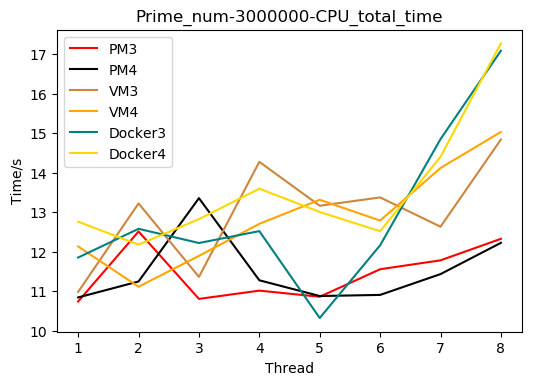

In [2]:
num = 4
pm_exe_time = []
vm_exe_time = []
c_exe_time = []
for i in range(num):
    with open("MSC/PM/txt/Cpu-sysbench"+ str(i+1) +".txt") as f:

        lines = f.readlines()
        #pm_exe_time = []
        for line in lines:
            m2 = re.match("(    total time)\:\s*(\d*\.\d*)", line)
            if m2:
                #print(m2.group(3))
                pm_exe_time.append(float(m2.group(2)))

    with open("MSC/VM/txt/Cpu-sysbench"+ str(i+1) +".txt") as f:

        lines = f.readlines()
        #vm_exe_time = []
        for line in lines:
            m2 = re.match("(    total time)\:\s*(\d*\.\d*)", line)
            if m2:
                #print(m2.group(3))
                vm_exe_time.append(float(m2.group(2)))
    
    with open("MSC/Docker/txt/Cpu-sysbench"+ str(i+1) +".txt") as f:

        lines = f.readlines()
        #c_exe_time = []
        for line in lines:
            m2 = re.match("(    total time)\:\s*(\d*\.\d*)", line)
            if m2:
                #print(m2.group(3))
                c_exe_time.append(float(m2.group(2)))
#print(pm_exe_time[72:80])
num = 48
i = 0
i1 = 24
i2 = 48
i3 = 72
count = 0
num_prime = 100000
x = ['1','2','3','4','5','6','7','8']
while i < 24:    
    plt.plot(x,pm_exe_time[i:(i+8)], color='b', label="PM1")
    plt.plot(x,pm_exe_time[i1:(i1+8)], color='g', label="PM2")
    plt.plot(x,vm_exe_time[i:(i+8)], color='purple', label="VM1")
    plt.plot(x,vm_exe_time[i1:(i1+8)], color='yellow', label="VM2")
    plt.plot(x,c_exe_time[i:(i+8)], color='pink', label="Docker1")
    plt.plot(x,c_exe_time[i1:(i1+8)], color='silver', label="Docker2")
    
    i += 8
    i1 += 8
    count += 1
    
    plt.legend(loc='best')
    plt.title('Prime_num-'+ str(num_prime) +'-CPU_total_time')
    plt.xlabel("Thread")
    plt.ylabel("Time/s")
    plt.rcParams['figure.figsize'] = (6.0, 4.0)
    plt.rcParams['figure.dpi'] = 100
    plt.rcParams['savefig.dpi'] = 100
    #plt.savefig('MSC/CPU-image/total-time/plot'+str(count)+'.png')
    plt.show()
    if((i)%8 == 0): 
        num_prime += 100000

num_prime = 1000000
count = 3
while i2 < 72:    
    plt.plot(x,pm_exe_time[i2:(i2+8)], color='r', label="PM3")
    plt.plot(x,pm_exe_time[i3:(i3+8)], color='k', label="PM4")
    plt.plot(x,vm_exe_time[i2:(i2+8)], color='peru', label="VM3")
    plt.plot(x,vm_exe_time[i3:(i3+8)], color='orange', label="VM4")
    plt.plot(x,c_exe_time[i2:(i2+8)], color='teal', label="Docker3")
    plt.plot(x,c_exe_time[i3:(i3+8)], color='gold', label="Docker4")
    
    i2 += 8
    i3 += 8
    count += 1
    
    plt.legend(loc='best')
    plt.title('Prime_num-'+ str(num_prime) +'-CPU_total_time')
    plt.xlabel("Thread")
    plt.ylabel("Time/s")
    plt.rcParams['figure.figsize'] = (6.0, 4.0)
    plt.rcParams['figure.dpi'] = 100
    plt.rcParams['savefig.dpi'] = 100
    #plt.savefig('MSC/CPU-image/total-time/plot'+str(count)+'.png')
    plt.show()
    if((i2)%8 == 0): 
        num_prime += 1000000
    

pm1:40.200100000000006
pm2:40.158
vm1:40.1485
vm2:40.2047
c1:40.206199999999995
c2:40.2178


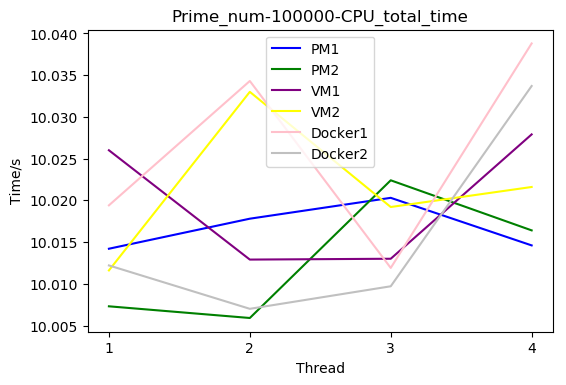

pm1:40.3495
pm2:40.2799
vm1:40.2966
vm2:40.636399999999995
c1:40.4296
c2:40.3675


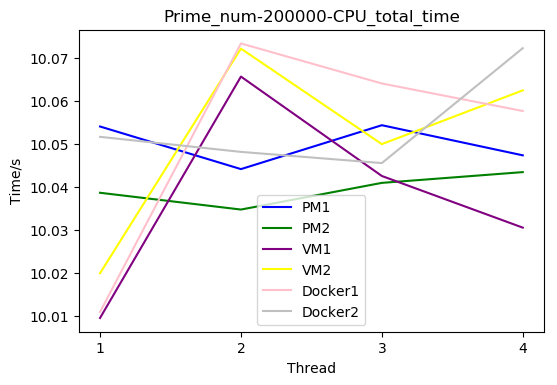

pm1:40.05200000000001
pm2:40.948
vm1:40.0854
vm2:41.9589
c1:40.0626
c2:41.7401


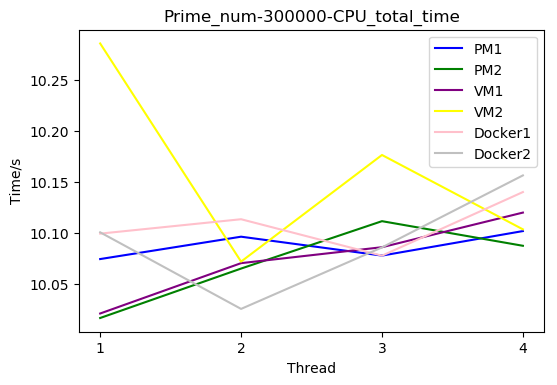

pm1:42.718900000000005
pm2:45.081
vm1:46.8726
vm2:44.3896
c1:44.6466
c2:44.5318


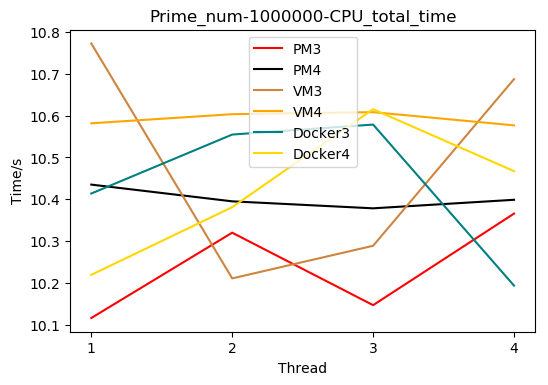

pm1:45.0585
pm2:46.7068
vm1:49.8285
vm2:47.831700000000005
c1:49.158899999999996
c2:51.3425


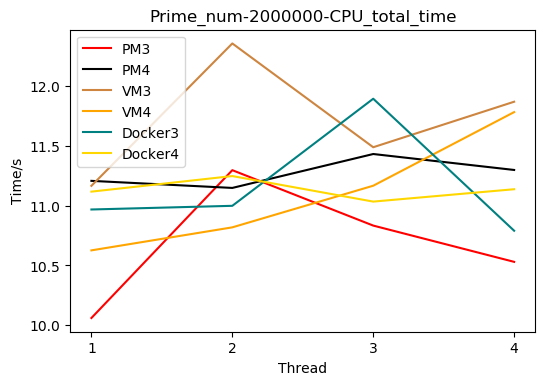

IndexError: list index out of range

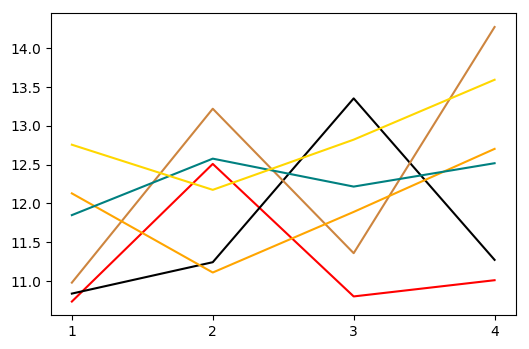

In [12]:
num = 4
pm_exe_time = []
vm_exe_time = []
c_exe_time = []
for i in range(num):
    with open("MSC/PM/txt/Cpu-sysbench"+ str(i+1) +".txt") as f:

        lines = f.readlines()
        #pm_exe_time = []
        for line in lines:
            m2 = re.match("(    total time)\:\s*(\d*\.\d*)", line)
            if m2:
                #print(m2.group(3))
                pm_exe_time.append(float(m2.group(2)))

    with open("MSC/VM/txt/Cpu-sysbench"+ str(i+1) +".txt") as f:

        lines = f.readlines()
        #vm_exe_time = []
        for line in lines:
            m2 = re.match("(    total time)\:\s*(\d*\.\d*)", line)
            if m2:
                #print(m2.group(3))
                vm_exe_time.append(float(m2.group(2)))
    
    with open("MSC/Docker/txt/Cpu-sysbench"+ str(i+1) +".txt") as f:

        lines = f.readlines()
        #c_exe_time = []
        for line in lines:
            m2 = re.match("(    total time)\:\s*(\d*\.\d*)", line)
            if m2:
                #print(m2.group(3))
                c_exe_time.append(float(m2.group(2)))
#print(pm_exe_time[72:80])
num = 48
i = 0
i1 = 24
i2 = 48
i3 = 72
count = 0
sum1 = 0
sum2= 0
sum3 = 0
sum4 = 0
sum5= 0
sum6 = 0
num_prime = 100000
x = ['1','2','3','4']
while i < 24:    
    plt.plot(x,pm_exe_time[i:(i+4)], color='b', label="PM1")
    plt.plot(x,pm_exe_time[i1:(i1+4)], color='g', label="PM2")
    plt.plot(x,vm_exe_time[i:(i+4)], color='purple', label="VM1")
    plt.plot(x,vm_exe_time[i1:(i1+4)], color='yellow', label="VM2")
    plt.plot(x,c_exe_time[i:(i+4)], color='pink', label="Docker1")
    plt.plot(x,c_exe_time[i1:(i1+4)], color='silver', label="Docker2")
    
    i += 8
    i1 += 8
    count += 1
    sum1 = pm_exe_time[i]+ pm_exe_time[i+1]+ pm_exe_time[i+2]+ pm_exe_time[i+3]
    sum2 = vm_exe_time[i]+ vm_exe_time[i+1]+ vm_exe_time[i+2]+ vm_exe_time[i+3]
    sum3 = c_exe_time[i]+ c_exe_time[i+1]+ c_exe_time[i+2]+ c_exe_time[i+3]
    sum4 = pm_exe_time[i1]+ pm_exe_time[i1+1]+ pm_exe_time[i1+2]+ pm_exe_time[i1+3]
    sum5 = vm_exe_time[i1]+ vm_exe_time[i1+1]+ vm_exe_time[i1+2]+ vm_exe_time[i1+3]
    sum6 = c_exe_time[i1]+ c_exe_time[i1+1]+ c_exe_time[i1+2]+ c_exe_time[i1+3]

    print("pm1:"+str(sum1))
    print("pm2:"+str(sum4))
    print("vm1:"+str(sum2))
    print("vm2:"+str(sum5))
    print("c1:"+str(sum3))
    print("c2:"+str(sum6))

    plt.legend(loc='best')
    plt.title('Prime_num-'+ str(num_prime) +'-CPU_total_time')
    plt.xlabel("Thread")
    plt.ylabel("Time/s")
    plt.rcParams['figure.figsize'] = (6.0, 4.0)
    plt.rcParams['figure.dpi'] = 100
    plt.rcParams['savefig.dpi'] = 100
    #plt.savefig('MSC/CPU-image/total-time/plot'+str(count)+'.png')
    plt.show()
    if((i)%8 == 0): 
        num_prime += 100000

num_prime = 1000000
count = 3
while i2 < 72:    
    plt.plot(x,pm_exe_time[i2:(i2+4)], color='r', label="PM3")
    plt.plot(x,pm_exe_time[i3:(i3+4)], color='k', label="PM4")
    plt.plot(x,vm_exe_time[i2:(i2+4)], color='peru', label="VM3")
    plt.plot(x,vm_exe_time[i3:(i3+4)], color='orange', label="VM4")
    plt.plot(x,c_exe_time[i2:(i2+4)], color='teal', label="Docker3")
    plt.plot(x,c_exe_time[i3:(i3+4)], color='gold', label="Docker4")
    
    i2 += 8
    i3 += 8
    count += 1
    sum1 = pm_exe_time[i2]+ pm_exe_time[i2+1]+ pm_exe_time[i2+2]+ pm_exe_time[i2+3]
    sum2 = vm_exe_time[i2]+ vm_exe_time[i2+1]+ vm_exe_time[i2+2]+ vm_exe_time[i2+3]
    sum3 = c_exe_time[i2]+ c_exe_time[i2+1]+ c_exe_time[i2+2]+ c_exe_time[i2+3]
    sum4 = pm_exe_time[i3]+ pm_exe_time[i3+1]+ pm_exe_time[i3+2]+ pm_exe_time[i3+3]
    sum5 = vm_exe_time[i3]+ vm_exe_time[i3+1]+ vm_exe_time[i3+2]+ vm_exe_time[i3+3]
    sum6 = c_exe_time[i3]+ c_exe_time[i3+1]+ c_exe_time[i3+2]+ c_exe_time[i3+3]

    print("pm1:"+str(sum1))
    print("pm2:"+str(sum4))
    print("vm1:"+str(sum2))
    print("vm2:"+str(sum5))
    print("c1:"+str(sum3))
    print("c2:"+str(sum6))
    plt.legend(loc='best')
    plt.title('Prime_num-'+ str(num_prime) +'-CPU_total_time')
    plt.xlabel("Thread")
    plt.ylabel("Time/s")
    plt.rcParams['figure.figsize'] = (6.0, 4.0)
    plt.rcParams['figure.dpi'] = 100
    plt.rcParams['savefig.dpi'] = 100
    #plt.savefig('MSC/CPU-image/total-time/plot'+str(count)+'.png')
    plt.show()
    if((i2)%8 == 0): 
        num_prime += 1000000
    

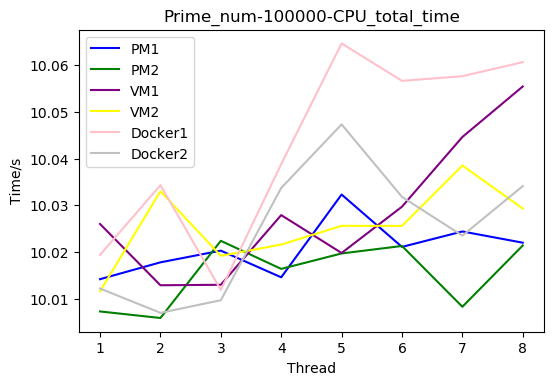

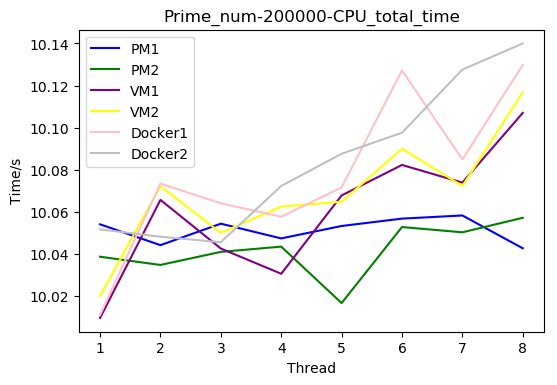

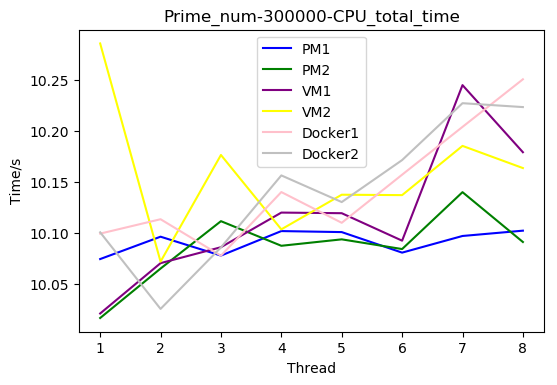

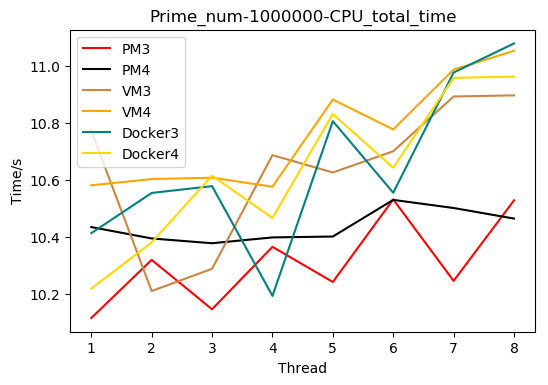

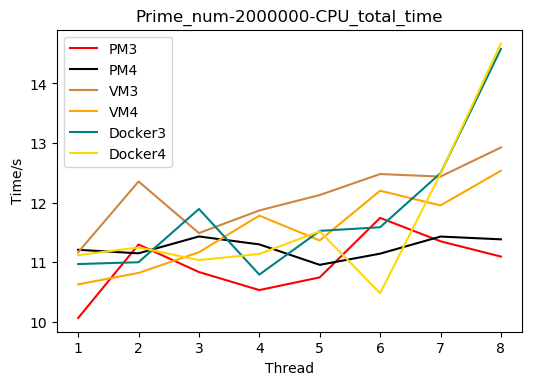

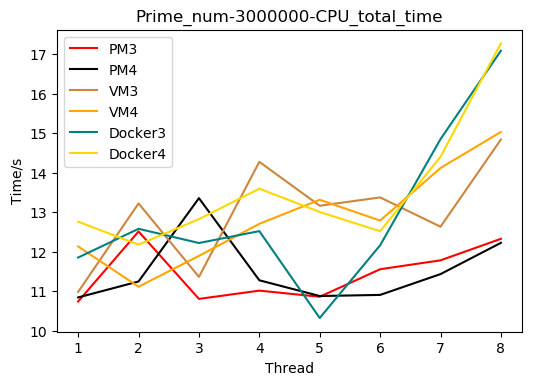

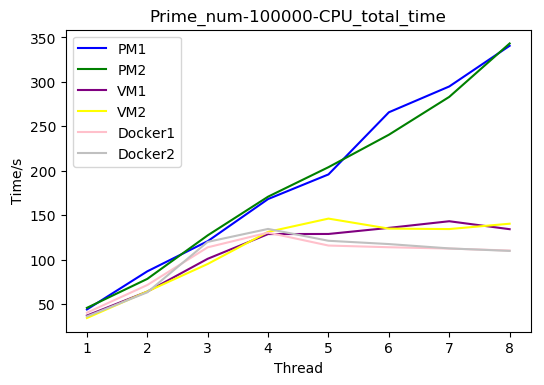

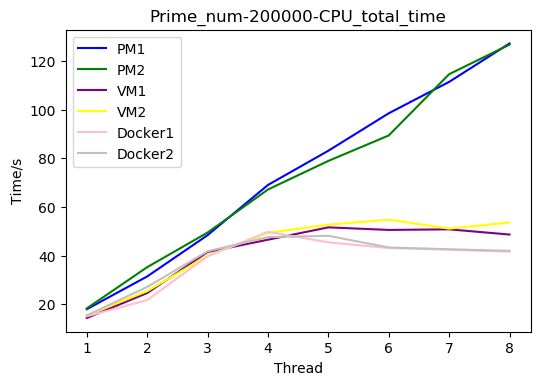

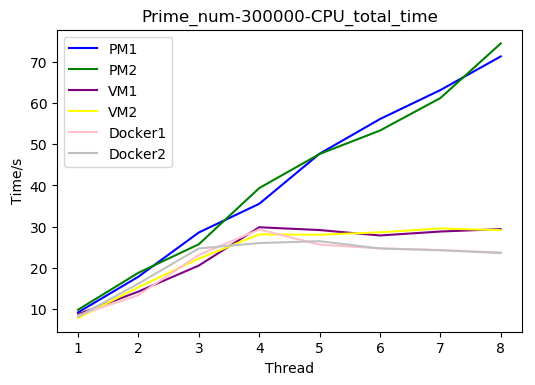

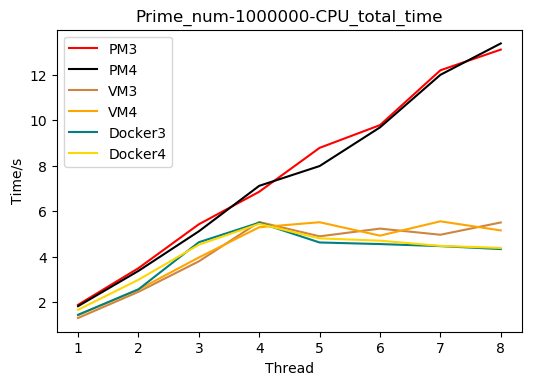

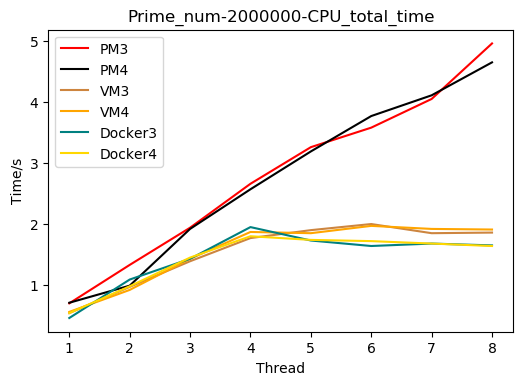

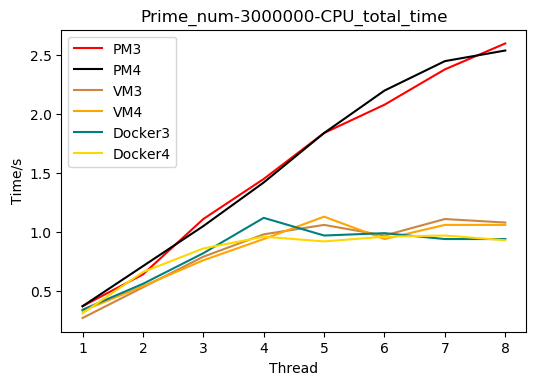

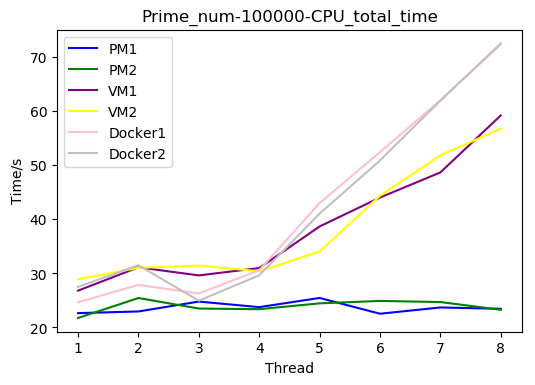

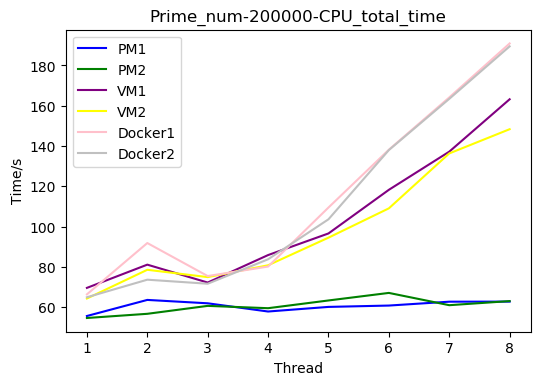

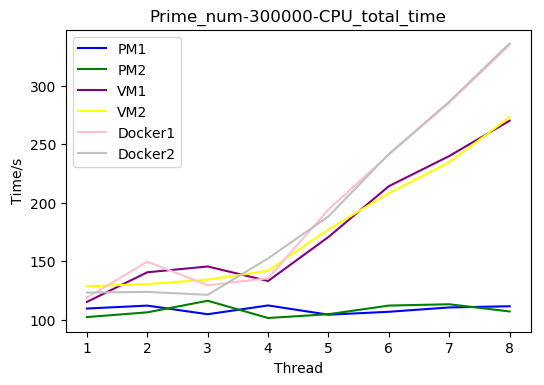

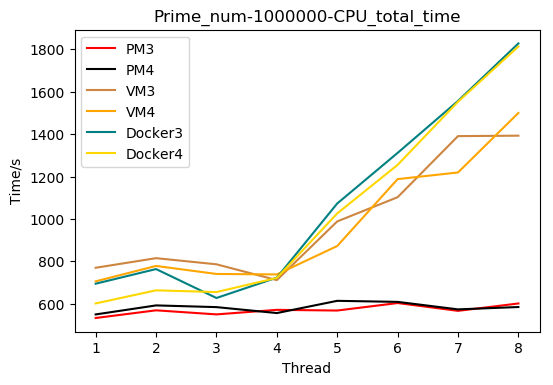

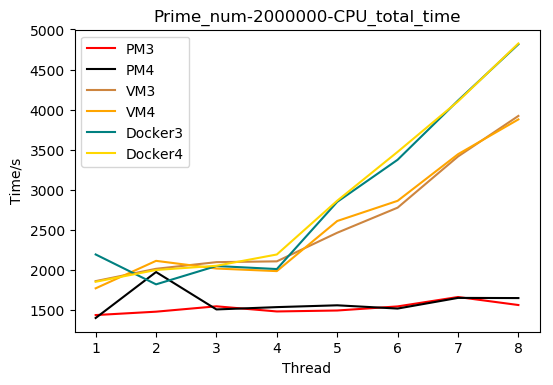

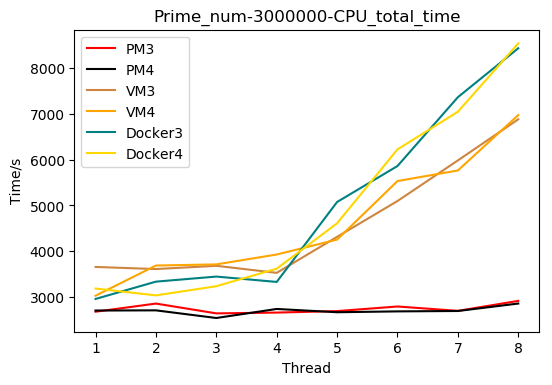

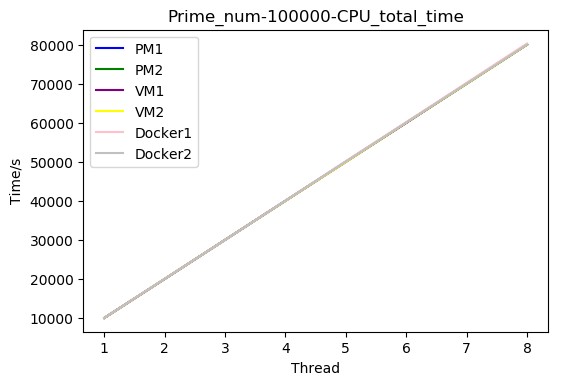

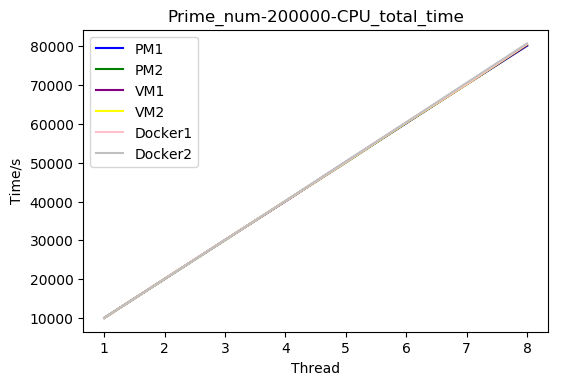

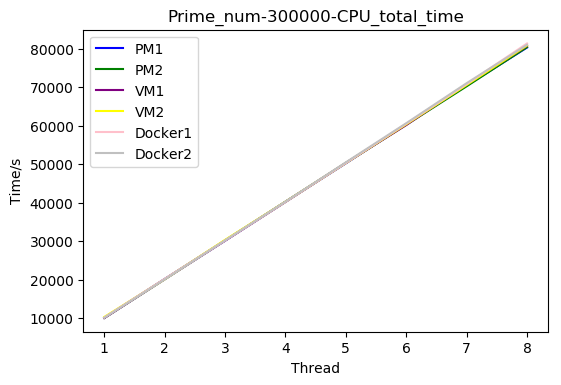

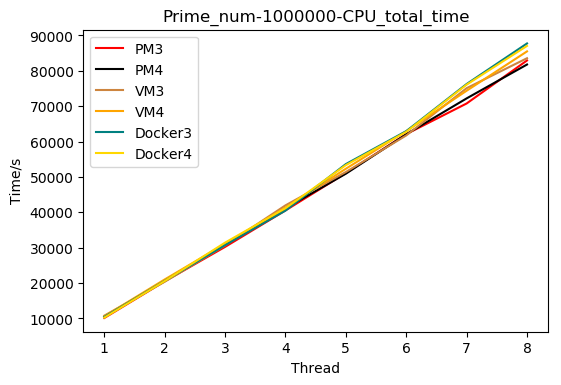

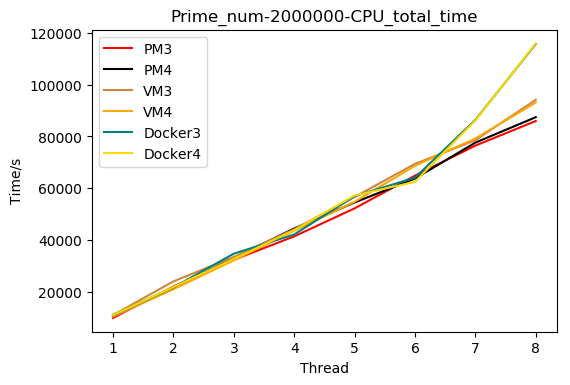

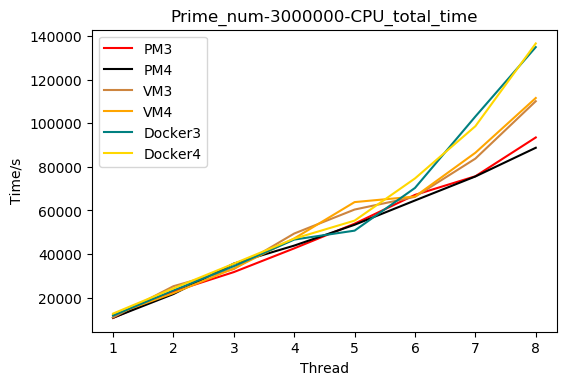

In [6]:
num = 16
n = 0
n1 = 1
match = ["(    total time)\:\s*(\d*\.\d*)","(    events per second)\:\s*(\d*\.\d*)","(         avg)\:\s*(\d*\.\d*)","(         sum)\:\s*(\d*\.\d*)"]
title = ['-CPU_total_time','-CPU-speed_events-per-second','-CPU-Latency-avg','-CPU-Latency-sum']
file_name = ['total-time','cpu-speed','Latency-avg','Latency-sum']
pm_data = []
vm_data = []
c_data = []
for ii in range(num):
    with open("MSC/PM/txt/Cpu-sysbench"+ str(n1) +".txt") as f:

        lines = f.readlines()
        #pm_exe_time = []
        for line in lines:
            m2 = re.match(match[n], line)
            if m2:
                #print(m2.group(3))
                pm_data.append(float(m2.group(2)))

    with open("MSC/VM/txt/Cpu-sysbench"+ str(n1) +".txt") as f:

        lines = f.readlines()
        #vm_exe_time = []
        for line in lines:
            m2 = re.match(match[n], line)
            if m2:
                #print(m2.group(3))
                vm_data.append(float(m2.group(2)))
    
    with open("MSC/Docker/txt/Cpu-sysbench"+ str(n1) +".txt") as f:

        lines = f.readlines()
        #c_exe_time = []
        for line in lines:
            m2 = re.match(match[n], line)
            if m2:
                #print(m2.group(3))
                c_data.append(float(m2.group(2)))
    n1 += 1
    if((ii+1)%4 == 0): 
       
        n1 = 1
        num = 48
        i = 0
        i1 = 24
        i2 = 48
        i3 = 72
        count = 0
        num_prime = 100000
        x = ['1','2','3','4','5','6','7','8']
        while i < 24:    
            plt.plot(x,pm_data[i:(i+8)], color='b', label="PM1")
            plt.plot(x,pm_data[i1:(i1+8)], color='g', label="PM2")
            plt.plot(x,vm_data[i:(i+8)], color='purple', label="VM1")
            plt.plot(x,vm_data[i1:(i1+8)], color='yellow', label="VM2")
            plt.plot(x,c_data[i:(i+8)], color='pink', label="Docker1")
            plt.plot(x,c_data[i1:(i1+8)], color='silver', label="Docker2")

            i += 8
            i1 += 8
            count += 1

            plt.legend(loc='best')
            plt.title('Prime_num-'+ str(num_prime) +'-CPU_total_time')
            plt.xlabel("Thread")
            plt.ylabel("Time/s")
            plt.rcParams['figure.figsize'] = (6.0, 4.0)
            plt.rcParams['figure.dpi'] = 100
            plt.rcParams['savefig.dpi'] = 100
            #plt.savefig('MSC/CPU-image/'+ file_name[n] +'/plot'+str(count)+'.png')
            plt.show()
            if((i)%8 == 0): 
                num_prime += 100000

        num_prime = 1000000
        count = 3
        while i2 < 72:    
            plt.plot(x,pm_data[i2:(i2+8)], color='r', label="PM3")
            plt.plot(x,pm_data[i3:(i3+8)], color='k', label="PM4")
            plt.plot(x,vm_data[i2:(i2+8)], color='peru', label="VM3")
            plt.plot(x,vm_data[i3:(i3+8)], color='orange', label="VM4")
            plt.plot(x,c_data[i2:(i2+8)], color='teal', label="Docker3")
            plt.plot(x,c_data[i3:(i3+8)], color='gold', label="Docker4")

            i2 += 8
            i3 += 8
            count += 1

            plt.legend(loc='best')
            plt.title('Prime_num-'+ str(num_prime) +'-CPU_total_time')
            plt.xlabel("Thread")
            plt.ylabel("Time/s")
            plt.rcParams['figure.figsize'] = (6.0, 4.0)
            plt.rcParams['figure.dpi'] = 100
            plt.rcParams['savefig.dpi'] = 100
            #plt.savefig('MSC/CPU-image/'+ file_name[n] +'/plot'+str(count)+'.png')
            plt.show()
            if((i2)%8 == 0): 
                num_prime += 1000000
        n += 1
        pm_data = []
        vm_data = []
        c_data = []
 

In [53]:
num = 5
for ii in range(0,num):
    print(random.uniform(390, 412))

393.7891532432919
407.7076204243691
391.0992840942805
411.11895704056377
405.84432936881046


In [8]:
random.uniform(398, 407)

304.996005717175